In [1]:
import datetime 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import folium 
import geopandas as gpd 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.systematic_analysis.load_bike import load_dataset
from load_inputs.systematic_analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.systematic_analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc


city = 'Lyon'
agg_iris_target_n = 100  # None  #100
threshold_volume_min = 1 # None # 1

for signal in ['in','out']:
    ds, df_raw, df =  load_dataset(f"bike_{signal}",agg_iris_target_n,threshold_volume_min)
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_{signal}'] = ds
    globals()[f'df_raw_{signal}'] = df_raw
    globals()[f'df_{signal}'] = df
    globals()[f'palette_{signal}'] =  palette

df_raw.head()

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module xgboost
Training and Hyper-parameter tuning with Ray is not possible
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_attracted_by_station15min.csv...
df pivoted:  (70094, 435)
df reindexed :  (35040, 435)
Len coverage period:  35040
df filtered:  (35040, 435)
   Loaded data: (35040, 435)
   Dimension after spatial agg: (35040, 26)
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
   Dimension after spatial agg: (35040, 26)


Spatial Unit ID,24,35,36,41,46,48,49,51,52,53,...,82,83,88,90,92,93,94,97,98,99
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,2.0,0.0,1.0,0.0,7.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
2019-01-01 00:15:00,0.0,1.0,1.0,2.0,0.0,9.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.0,14.0,2.0,2.0,3.0,1.0
2019-01-01 00:30:00,0.0,8.0,0.0,0.0,0.0,9.0,4.0,0.0,4.0,1.0,...,0.0,0.0,2.0,2.0,1.0,6.0,14.0,5.0,2.0,0.0
2019-01-01 00:45:00,11.0,9.0,0.0,0.0,0.0,16.0,17.0,7.0,8.0,5.0,...,1.0,0.0,6.0,12.0,0.0,5.0,19.0,5.0,7.0,1.0
2019-01-01 01:00:00,1.0,7.0,0.0,2.0,0.0,24.0,4.0,3.0,8.0,2.0,...,1.0,1.0,4.0,5.0,0.0,12.0,27.0,6.0,9.0,1.0


# Histogramme des volumes agrégée 15 min en business day / non business day

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


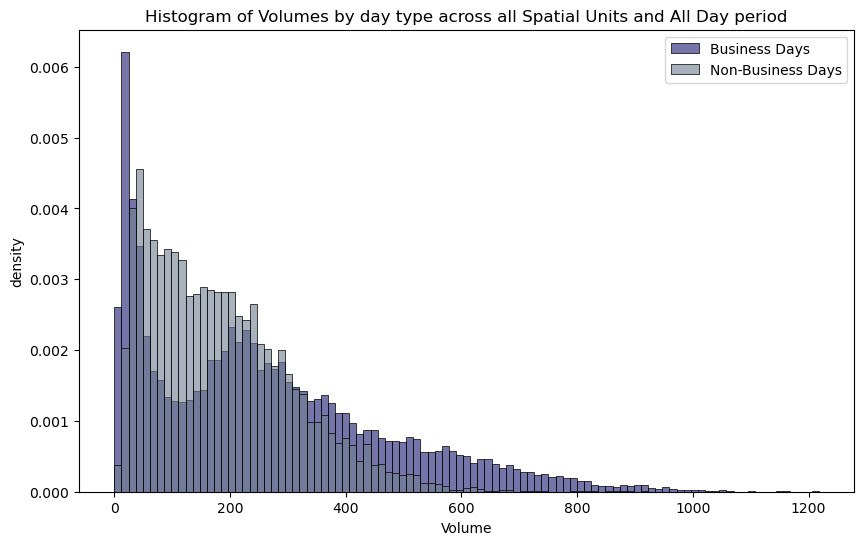

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


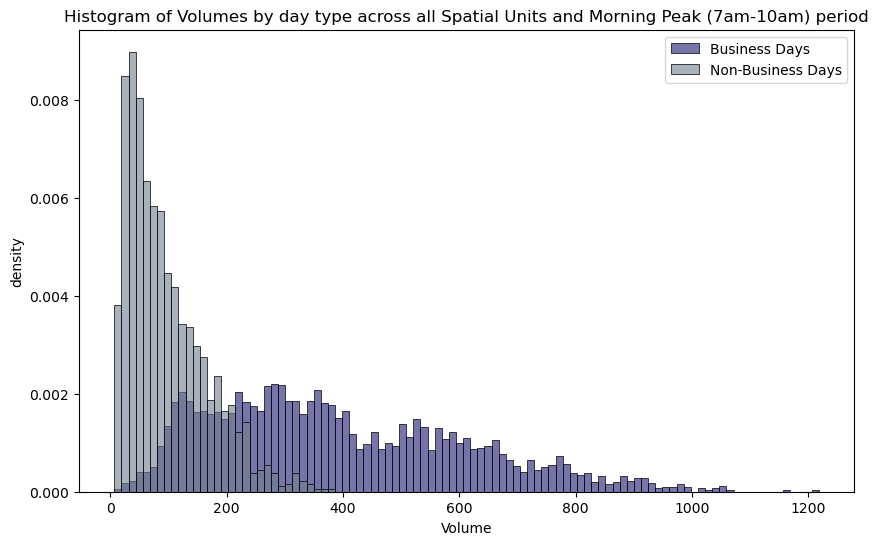

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


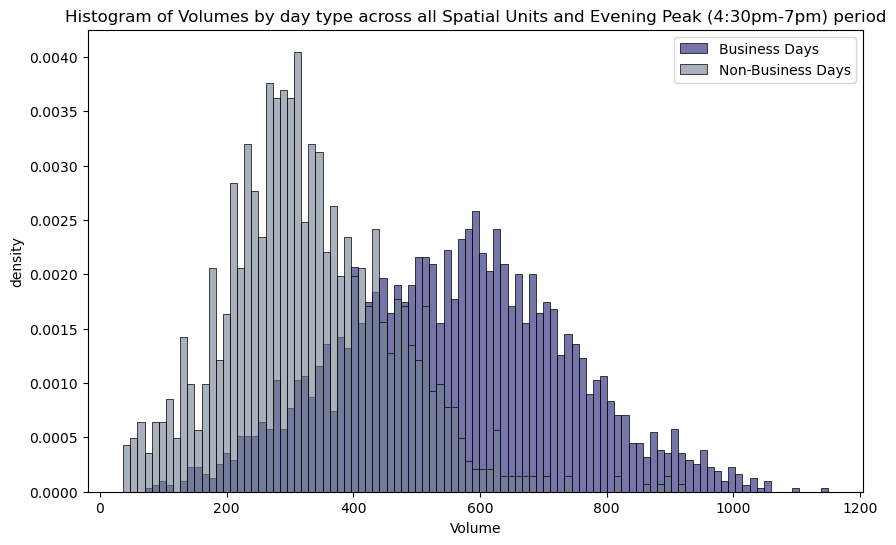

Number of remaining time-slots after filtering 7028
Number of remaining time-slots after filtering 6275
Number of remaining time-slots after filtering 4769
Number of remaining time-slots after filtering 3192
Number of remaining time-slots after filtering 2850
Number of remaining time-slots after filtering 2166


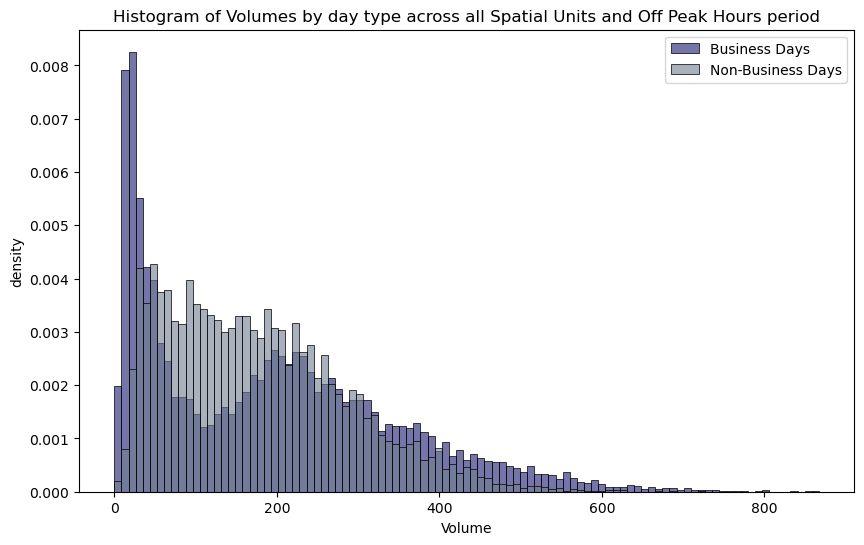

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


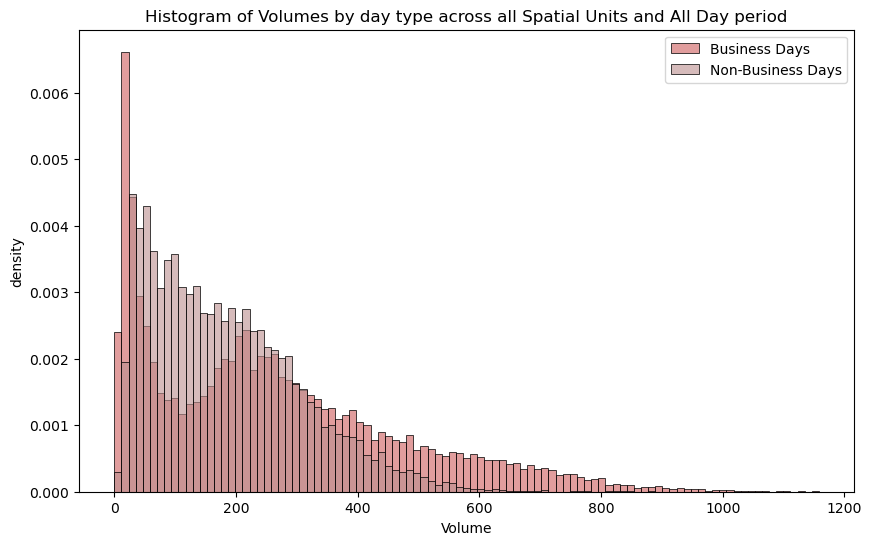

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


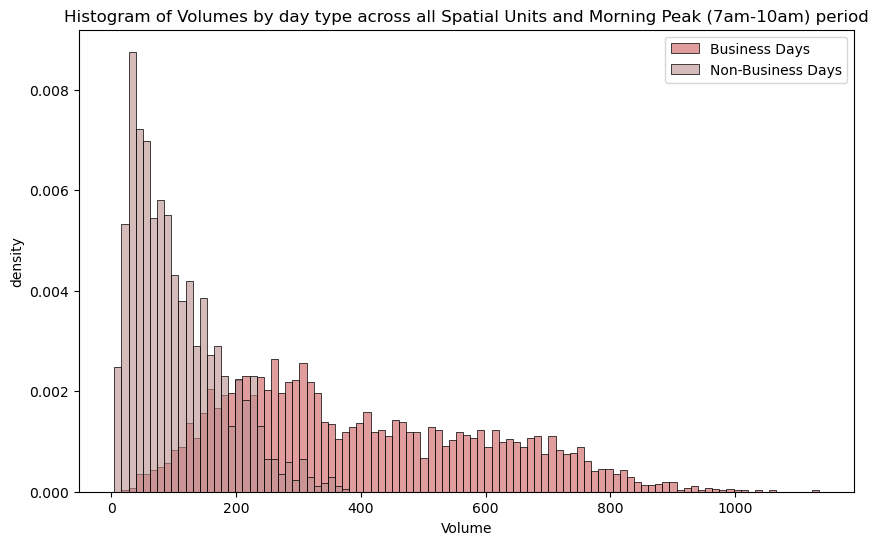

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


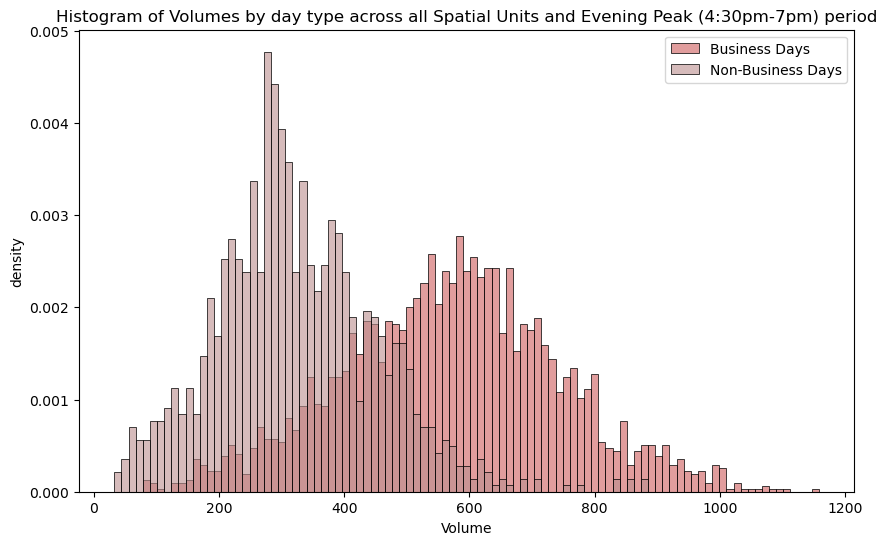

Number of remaining time-slots after filtering 7028
Number of remaining time-slots after filtering 6275
Number of remaining time-slots after filtering 4769
Number of remaining time-slots after filtering 3192
Number of remaining time-slots after filtering 2850
Number of remaining time-slots after filtering 2166


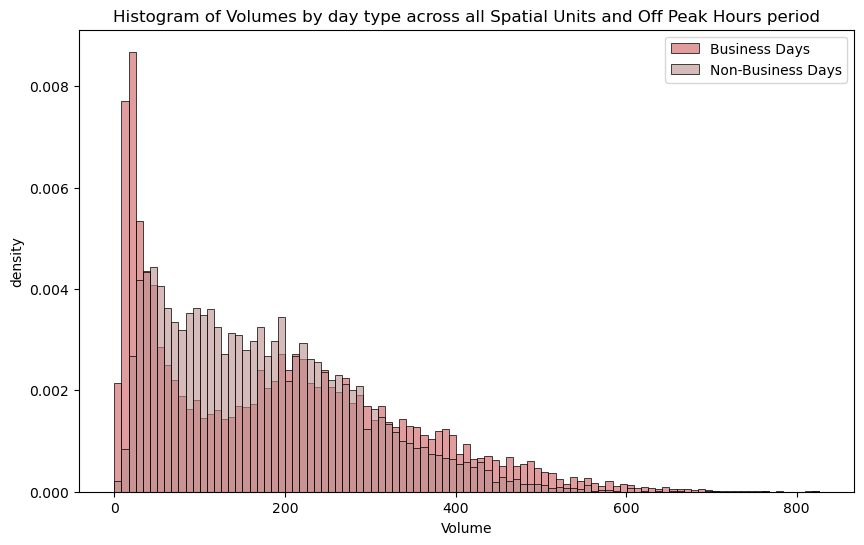

In [6]:
# from utils import get_histogram_per_day_type
stats = 'density'
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'all_day',stats = stats, palette = [IN_bdc, IN_nbdc])
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'morning_peak',stats = stats, palette =palette,n_bins = 100)
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'evening_peak',stats = stats, palette = [IN_bdc, IN_nbdc])

for signal in ['in','out']:
    df_raw = globals()[f'df_raw_{signal}']
    palette = globals()[f'palette_{signal}']
    for period in ['all_day','morning_peak','evening_peak','off_peak']:
        folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/bike_hist"
        save_path = f'{folder}/bike_hist_{stats}_{signal}_{period}.pdf'# None 
        ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = period,stats = stats, palette = palette,n_bins = 100,save_path= save_path)
        # ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'evening_peak',stats = stats, palette = [IN_bdc, IN_nbdc])

# Boxplot des volumes par station en business days / non business days:

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

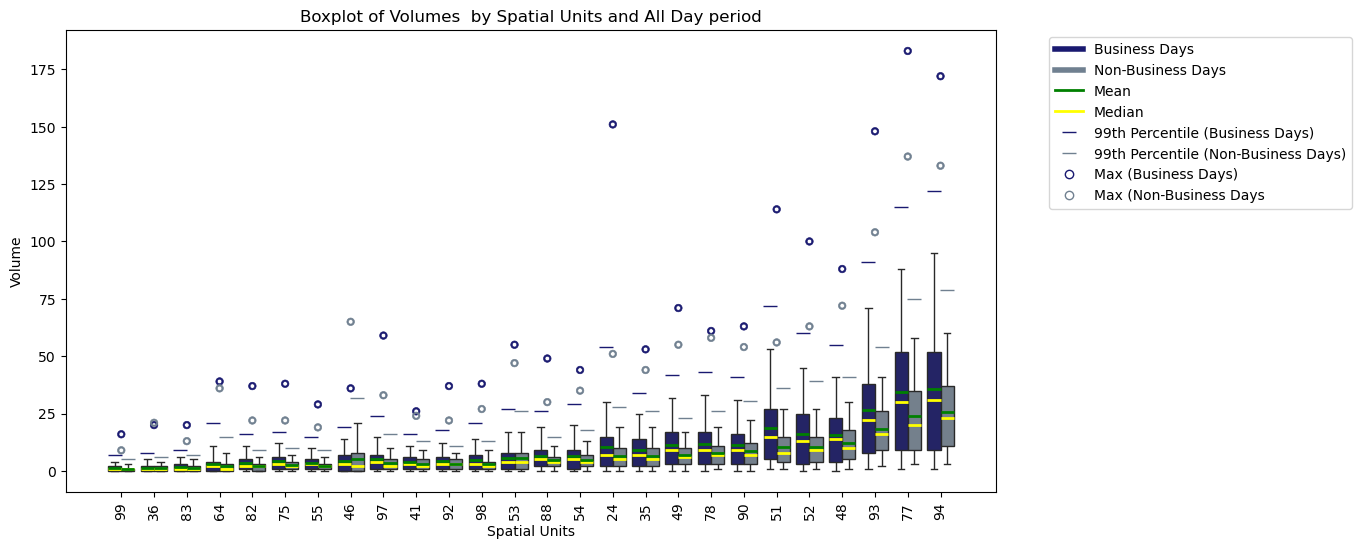

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

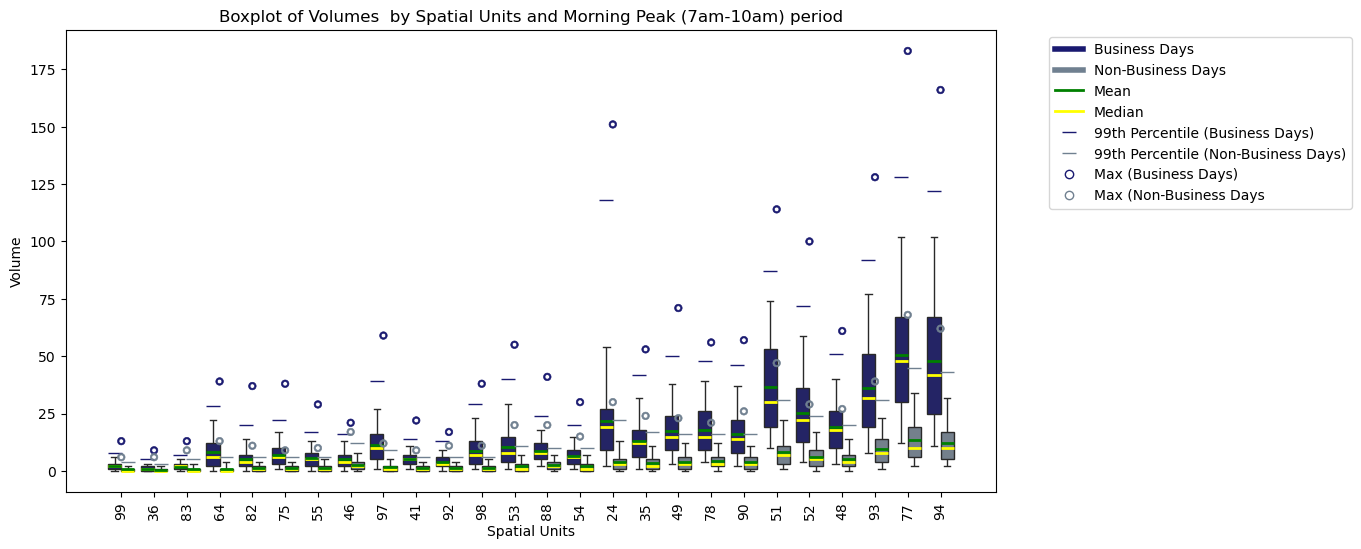

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

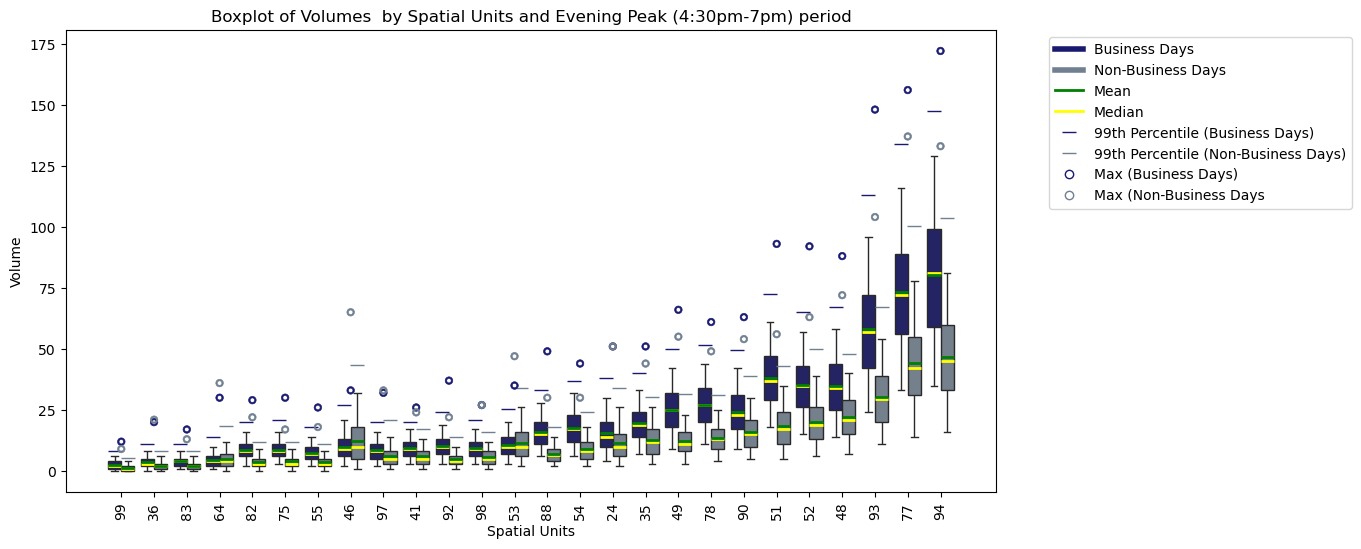

Number of remaining time-slots after filtering 7028
Number of remaining time-slots after filtering 6275
Number of remaining time-slots after filtering 4769
Number of remaining time-slots after filtering 3192
Number of remaining time-slots after filtering 2850
Number of remaining time-slots after filtering 2166


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

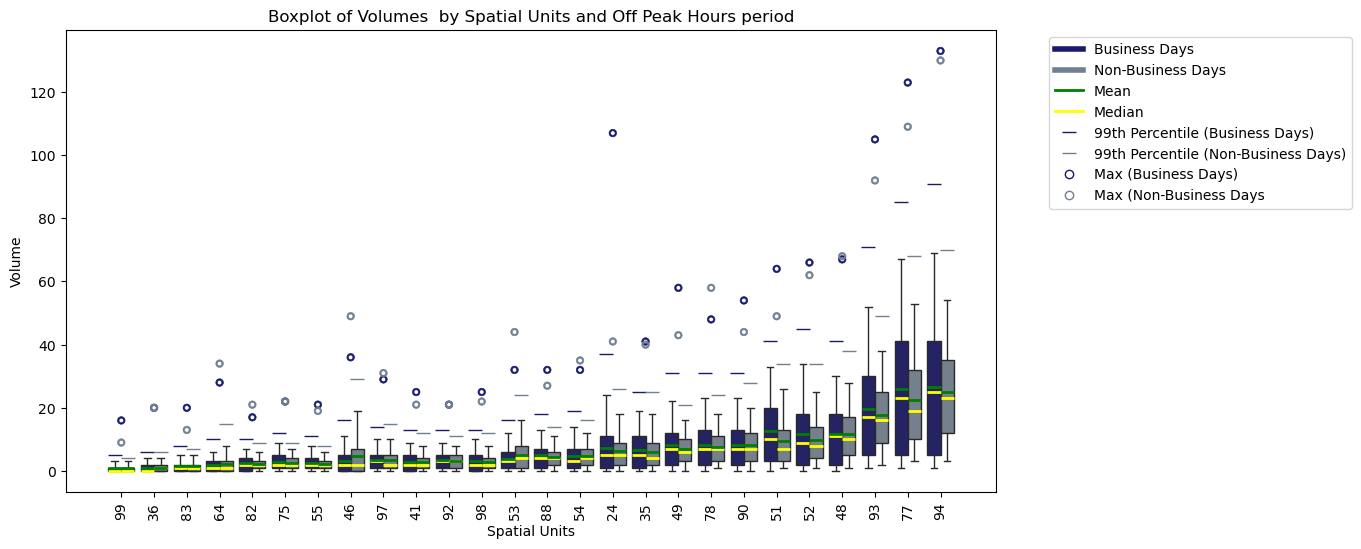

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

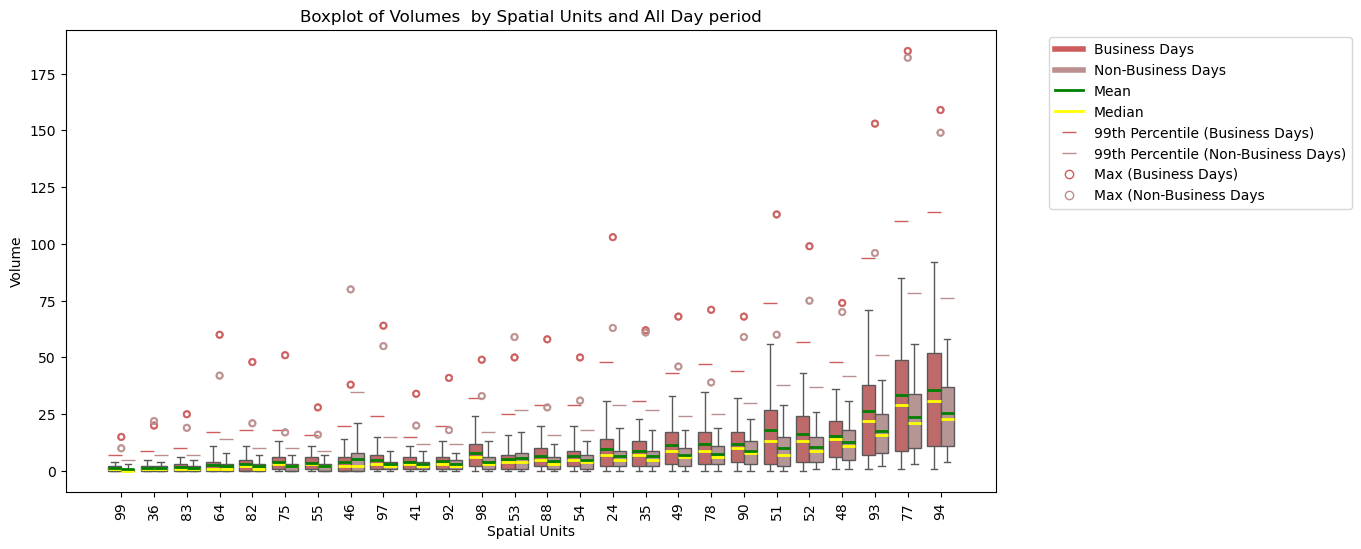

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

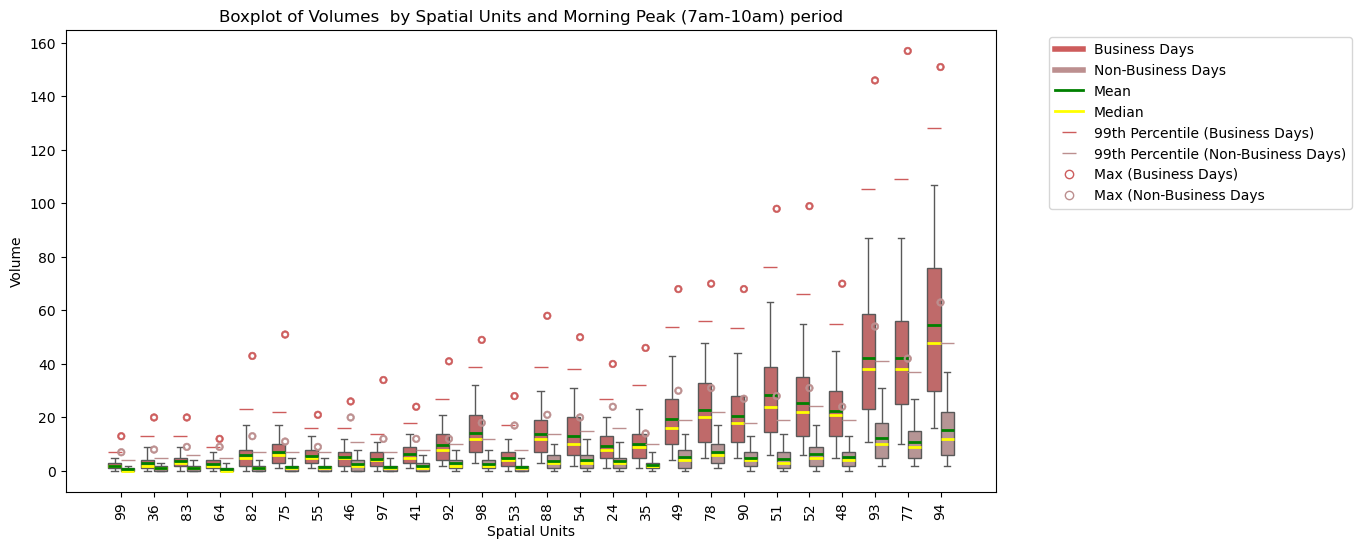

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

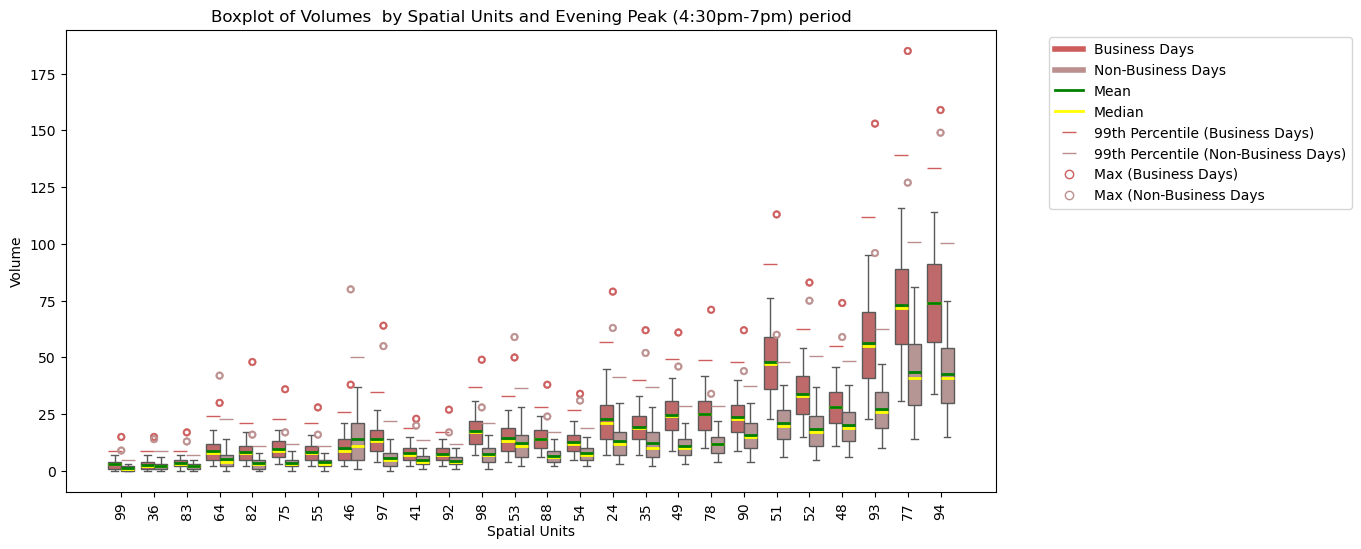

Number of remaining time-slots after filtering 7028
Number of remaining time-slots after filtering 6275
Number of remaining time-slots after filtering 4769
Number of remaining time-slots after filtering 3192
Number of remaining time-slots after filtering 2850
Number of remaining time-slots after filtering 2166


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:383: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:393: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

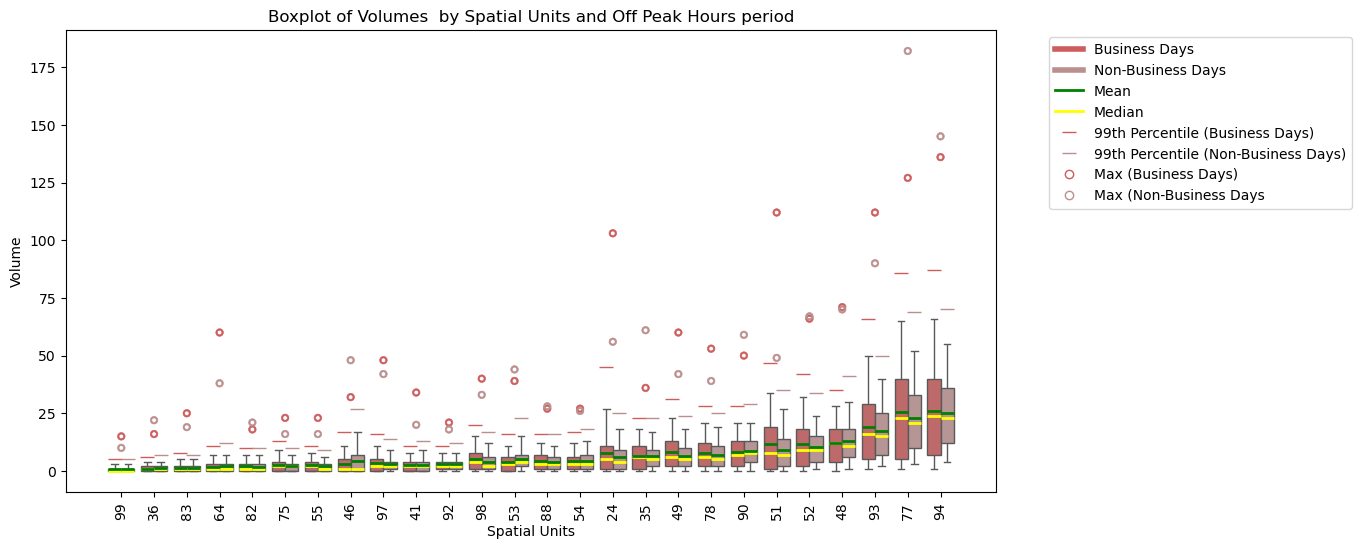

In [8]:
# # from utils import get_boxplot_per_spatial_unit_per_day_type

df_all = df_raw_in + df_raw_out
for signal in ['in','out']:
    df_raw_i = globals()[f'df_raw_{signal}'].copy()
    palette = globals()[f'palette_{signal}']
    for period in ['all_day','morning_peak','evening_peak','off_peak']:
        folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/bike_boxplot"
        save_path = f'{folder}/bike_boxplot_{signal}_{period}.pdf'# None
        df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw_i,period = period,city= city, palette = palette,save_path = save_path,df_all = df_all)


# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette)


# # normalize df_raw:
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,normtype='zscore')  
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,normtype='zscore')


# # normalize anf filtered df_raw :
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# # --------------------------------------------------
# # Identification des particularités:


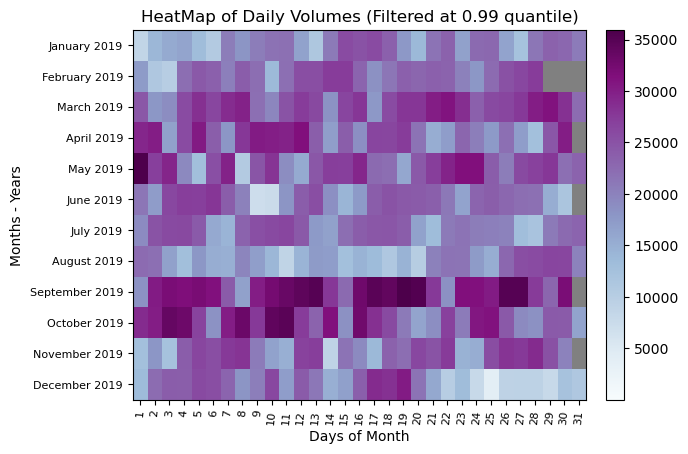

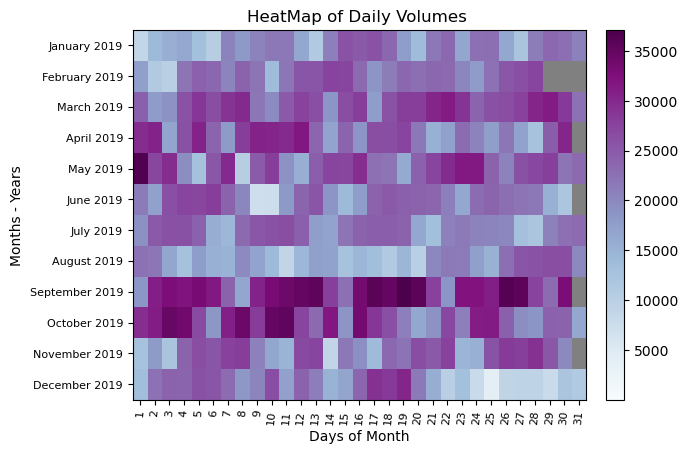

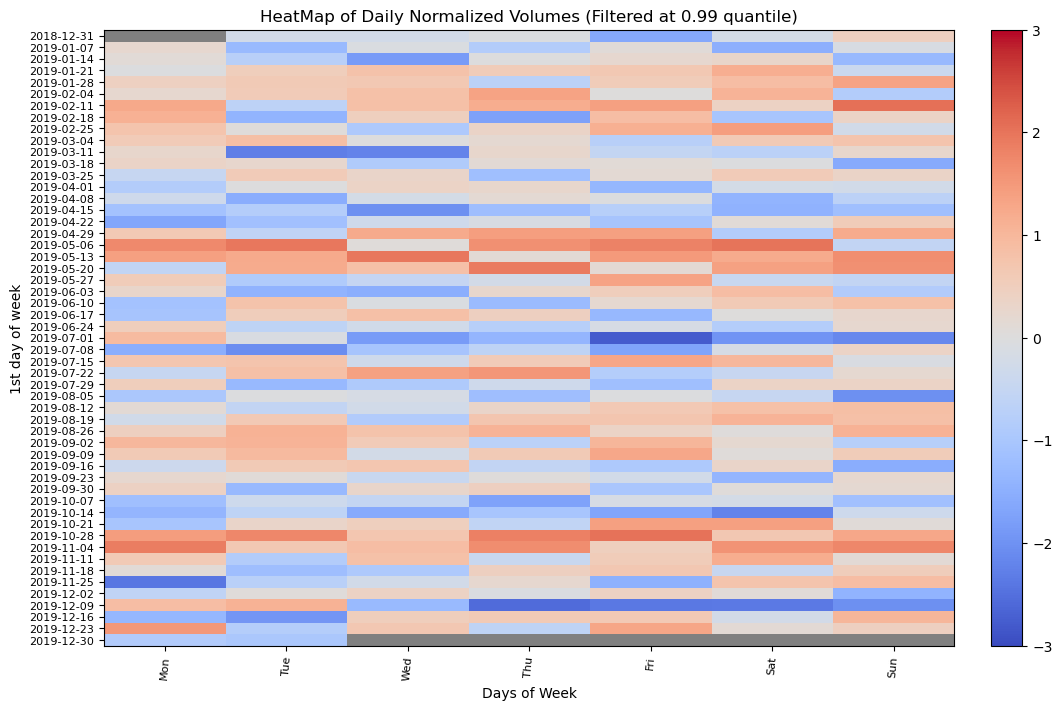

In [15]:
cmap = 'BuPu' # 'hot' #'YlOrRd' # 'RdYlBu'
bool_reversed= False 
filter_q = 0.99
folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/bike_heatmap"

save_path = f'{folder}/bike_heatmap_{city}_q{filter_q}.pdf'# None
df_agg = heatmap(df_raw,city= city,filter_q = filter_q,cmap = cmap,bool_reversed = bool_reversed,
                 save_path = save_path )

save_path = f'{folder}/bike_heatmap_{city}.pdf'# None
df_agg = heatmap(df_raw,city= city,cmap = cmap,bool_reversed = bool_reversed,
                 save_path = save_path )

save_path = f'{folder}/bike_heatmap_{city}_standardize.pdf'# None
df_agg = heatmap(df_raw,city= city,filter_q = 0.99,norm = True,
                 cmap = 'coolwarm',bool_reversed = bool_reversed,
                 normalized_based_on= ('business_day','school_holidays'), # ,'weekday'
                 index = 'monday_date',
                 columns = 'day_of_week',
                 vmin = -3, vmax = 3,
                 figsize = (12,8),
                 save_path = save_path 
)

# Folium Map

In [9]:
city = 'Lyon'

for signal in ['in','out']:
    ds, df_raw, df =  load_dataset(f"bike_{signal}",None,None)
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_{signal}_no_agg'] = ds
    globals()[f'df_raw_{signal}_no_agg'] = df_raw
    globals()[f'df_{signal}_no_agg'] = df
    globals()[f'palette_{signal}_no_agg'] =  palette


Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_attracted_by_station15min.csv...
df pivoted:  (70094, 435)
df reindexed :  (35040, 435)
Len coverage period:  35040
df filtered:  (35040, 435)
   Loaded data: (35040, 435)
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.000%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.782%
Values with issues:  18.161%
Regular Values that we have to set to 0:  1.294%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.000%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.800%
Values with issues:  18.161%
Regular Values that we have to set to 0:  1.314%
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
Values with 

In [17]:
# Open Json velov dataset 
import json
import pandas as pd
import folium
from branca.element import MacroElement,Template
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString

from constants.paths import FOLDER_PATH
from load_inputs.systematic_analysis.utils import filter_per_day_type, get_inflow_outflow
data_folder  = f'../../../../../../data/rrochas/raw_data'




def load_iris(ds_in,agg_iris_target_n):
    # Load Iris
    remaining_iris_zones = ds_in.spatial_unit
    if agg_iris_target_n is None:
        gdf_iris = gpd.read_file(os.path.join(FOLDER_PATH, f'lyon_iris_shapefile', 'lyon.shp'))
    else:
        gdf_iris = gpd.read_file(os.path.join(FOLDER_PATH, f'lyon_iris_agg{agg_iris_target_n}', 'lyon.shp'))
    gdf_iris['remaining_iris_zones'] = gdf_iris.index.isin(remaining_iris_zones)
    gdf_iris['spatial_unit'] = gdf_iris.index
    return gdf_iris


def load_bike_gdf(inflow,outflow):
    # load bike sharing stations : 
    json_path = 'pvo_patrimoine_voirie.pvostationvelov.json'
    gdf_velov = gpd.read_file(os.path.join(FOLDER_PATH, json_path))

    gdf_velov = pd.merge(gdf_velov, inflow, on='idstation')
    gdf_velov = pd.merge(gdf_velov, outflow, on='idstation')
    return gdf_velov




def plot_velov_map(gdf_iris,gdf_velov,period,city,period_study):


    m = gdf_iris.explore(column = 'remaining_iris_zones', tiles='CartoDB positron',
                        style_kwds=dict(opacity=0.9, fillOpacity=.3,weight=0.5,color='black'), 
                            cmap = ['blbal','lightgray'],  # 'YlGn' , 'Set1', 'Set2', 'Set3', 'Paired', 'Pastel1', 'Pastel2', 'Dark2', 'Accent',
                        
                        legend = False, name = 'Iris Zones')


    maxi_flow = max(gdf_velov.Inflow.max(),gdf_velov.Outflow.max())
    mini_flow = min(gdf_velov.Inflow.min(),gdf_velov.Outflow.min())
    gdf_inflow = gdf_velov.copy()
    xoff = 0.0008
    gdf_inflow['geometry'] = gdf_inflow['geometry'].translate(xoff=-xoff)
    m = gdf_velov.explore(m=m, 
                        column = 'Inflow' ,
                        legend = False, 
                        name = 'Bike-Sharing Stations',
                        style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Inflow"]/maxi_flow), 
                                                                    'color' : IN_bdc,
                                                                    'fillColor': IN_bdc,
                                                                    'fillOpacity':0.5
                                                                    } if x["properties"]["Inflow"]>0 else {
                                                                        "radius": 20*(mini_flow/maxi_flow),
                                                                        'color' : 'gray',
                                                                        'fillColor': 'gray',
                                                                        'fillOpacity':0.5
                                                                    }
                            },
                        )

    gdf_outflow = gdf_velov.copy()
    gdf_outflow['geometry'] = gdf_outflow['geometry'].translate(xoff=xoff)
    m = gdf_outflow.explore(m=m,
                            column = 'Outflow' ,
                            legend = False,
                            name = 'Bike-Sharing Stations',
                            style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Outflow"]/maxi_flow), 
                                                                    'color' : OUT_bdc,
                                                                    'fillColor': OUT_bdc,
                                                                    'fillOpacity':0.5} if x["properties"]["Inflow"]>0 else {
                                                                        "radius": 20*(mini_flow/maxi_flow),
                                                                        'color' : 'gray',
                                                                        'fillColor': 'gray',
                                                                        'fillOpacity':0.5
                                                                    }
                        },
    )

    folium.LayerControl().add_to(m)


    # Create a custom legend
    



    # Formatting function for labels using Million (e.g., 1.5) and Thousands (e.g., 30k) notation
    def format_volume_label(v):
        if v >= 100000:
            return f"{v / 1000000:.1f}".rstrip('0').rstrip('.')
        return f"{int(v / 1000)}k"

    # Construction of a vertical scale including five circles of increasing size
    scale_steps = [maxi_flow * (i / 5) for i in range(1, 6)]
    scale_html_items = ""
    for val in scale_steps:
        r_px = 20 * (val / maxi_flow)
        label_str = format_volume_label(val)
        scale_html_items += f"""
        <div style="display: flex; align-items: center; margin-bottom: 6px;">
            <div style="width: 44px; display: flex; justify-content: center; align-items: center;">
                <div style="width: {r_px*2}px; height: {r_px*2}px; border-radius: 50%; border: 1.5px solid #666; background-color: #999; opacity: 0.6;"></div>
            </div>
            <span style="margin-left: 12px; color: #333; font-weight: 500;">{label_str}</span>
        </div>"""

    # Custom HTML macro to display the general legend and the volume reference scale
    legend_html_template = f"""
    {{% macro html(this, kwargs) %}}
    <div style="position: fixed; 
        bottom: 20px; right: 20px; width: 180px; 
        background-color: white; border: 2px solid grey; border-radius: 8px;
        padding: 10px; font-family: Arial, sans-serif; font-size: 14px;
        z-index: 9999; opacity: 0.9;">
        
        <h5 style="margin-top: 10px; margin-bottom: 5px; border-bottom: 1px solid lightgrey;">Aggregated IRIS zones</h5>
        &nbsp; <i class="fa fa-square" style="color:lightgray; -webkit-text-stroke: 1px black;"></i> &nbsp; Remaining Areas<br>
        &nbsp; <i class="fa fa-square" style="color:gray; -webkit-text-stroke: 1px black;"></i> &nbsp; Removed Areas <br>

        <h5 style="margin-top: 15px; margin-bottom: 5px; border-bottom: 1px solid lightgrey;">Bike Sharing Station</h5>
        &nbsp; <i class="fa fa-circle" style="color:gray"></i> &nbsp; No flow<br>
        &nbsp; <i class="fa fa-circle" style="color:{IN_bdc}"></i> &nbsp; Drop-off Volume<br>
        &nbsp;  <i class="fa fa-circle" style="color:{OUT_bdc}"></i> &nbsp; Pick-up Volume<br>
        <h5 style="margin: 0 0 10px 0; font-size: 13px; border-bottom: 1px solid #ddd; padding-bottom: 4px;">Volume Scale</h5>
        {scale_html_items}
    </div>
    {{% endmacro %}}"""

    # If needed add: 
    #   &nbsp; <i class="fa fa-circle" style="color: lightgreen; -webkit-text-stroke: 1px green; text-stroke: 1px green;"></i> &nbsp; Bike-Sharing Stations<br>
    #  &nbsp; <i class="fa fa-square" style="color:black; -webkit-text-stroke: 1px black;"></i> &nbsp; Unpartitioned municipality<br>
    legend = MacroElement()
    legend._template = Template(legend_html_template)

    # Add the legend to the map
    m.get_root().add_child(legend)

    # Add title :
    title_html = """<h3 align="center" style="font-family: Arial, sans-serif; font-size:20px"><b>Summed Shared Bike Pick-Up and Drop-Off"""
    
    if period != 'all_day':
        if period == 'morning_peak':
            title_html = title_html + " during morning peak hours (7:00 am -10: 00 am) "
        if period == 'evening_peak':
            title_html = title_html + " during evening peak hours (4:30 pm -7:00 pm) "
    
    title_html = title_html +  f"at station level of {city} - \n{period_study} </b></h3>"

    

    m.get_root().html.add_child(folium.Element(title_html))
    return m 

def plot_bike_all_map(df_raw_in_no_agg,df_raw_out_no_agg,filter_q= None,period = None,day_type = None,index_name = 'idstation', period_study='',save_path= None):
    inflow, outflow = get_inflow_outflow(df_raw_in_no_agg,df_raw_out_no_agg,filter_q= filter_q,city = city,period = period,day_type = day_type,index_name = index_name)
    gdf_iris = load_iris(ds_in,agg_iris_target_n)
    gdf_velov = load_bike_gdf(inflow,outflow)
    period_study = f"Data period from {df_raw_in_no_agg.index.min().strftime('%Y-%m-%d')} to {df_raw_in_no_agg.index.max().strftime('%Y-%m-%d')}"
    m = plot_velov_map(gdf_iris,gdf_velov,period,city,period_study)

    if save_path is not None:
        print(f"Saving map to {save_path}")
        m.save(save_path)
    return m 

In [10]:
period = 'evening_peak' # 'morning_peak' # 'all_day' # 'evening_peak' # None 
day_type = 'business_day' # 'non_business_day' # None
folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots"
save_path = f'{folder}/bike_{period}_{day_type}.html'# None 
filter_q = 0.99
m = plot_bike_all_map(df_raw_in_no_agg,df_raw_out_no_agg,filter_q= filter_q,period = period,day_type =day_type,save_path= save_path)
m

NameError: name 'plot_bike_all_map' is not defined